## <p style="background-color:#757D70;color:#D5CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 4** :Projet DATA MINING   </p>

---
- Professeur : [**Sayoba GANSANE**]()
- Ecole : [**Université Alioune Diop de Bambey (UADB)**]()
- Cours: [**Data Mining Approche Informatique**]()
- Niveau :  [**Master 2**]()
- Parcours :  [*Statistique et Informatique Decisionnel (SID)*]()
- Période :  [*Mai-2025*]()

---


## Analyse descriptive et préparation des données

**Objectif :**  
Comprendre la structure des données clients d’un site e-commerce, nettoyer la base
et préparer les variables nécessaires aux différentes modélisations :
- Règles d’association (APRIORI / FP-GROWTH)
- Segmentation K-means
- Segmentation RFM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy

plt.style.use("ggplot")


In [5]:
data = pd.read_csv("donnees_ecommerce.csv", encoding="ISO-8859-1")


In [6]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
df =data.copy()

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Aperçu sur les données

In [10]:
#Nombre de variables
def nb_col(base):
    return len(base.columns)

#Nombre d'observation
def nb_lignes(base):     
    return len(base)

#Nombre de valeurs manquantes
def nb_val_manquante(base):
    return base.isna().sum().sum()

#Pourcentage de valeurs manquantes
def freq_val_manquante(base):
    return base.isna().sum().sum()/(base.size)

#Nombre de lignes dupliqués
def nb_lignes_dupliq(base):
    return len(base)-len(base.drop_duplicates())

#Pourcentage de ligne dupliqués
def freq_lignes_dupliq(base):
    return nb_lignes_dupliq(base)/nb_lignes(base)

#Nombre de lignes entierement vide
def nb_lignes_vide(base):
    return base.isna().all(axis=1).sum()

#Pourcentage de ligne entierement vides
def freq_lignes_vide(base):
    return base.isna().all(axis=1).sum()/nb_lignes(base)

##Nombre de colonnes vides
def col_vide(base):
    return base.isnull().all().sum().sum()

##Pourcentage de colonnes vides
def freq_col_vide(base):
    return base.isnull().all().sum().sum()/nb_col(base)

##Nombre de colonnes ayant le même nom
def nom_col_dupliq(base):
    return base.columns.duplicated().sum()

## colonnes dupliquées en fonction des observation même si les noms sont identiques
def getDuplicateColumns(base):
    duplicateColumnNames = set()

    for x in range(base.shape[1]):
        col = base.iloc[:, x]

        for y in range(x + 1, base.shape[1]):
            otherCol = base.iloc[:, y]

            if col.equals(otherCol):
                duplicateColumnNames.add(base.columns.values[y])

    return list(duplicateColumnNames)

## Compter le nombre de colonnes dupliquées
def nb_col_dupliq(base):
    return len(getDuplicateColumns(base))

#### Recupérations des noms des colonnes et Dataframe
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


#Affichage des statistiques globales sur le dataframe
def stat_globale(base):    
    print('Données : {}'.format(namestr(base, globals())))
    print('Nombre de variables : {}'.format(nb_col(base)))
    print('Nombre des observations : {}'.format(nb_lignes(base)))
    print('Nombre de valeurs manquantes : {}'.format(nb_val_manquante(base)))
    print('% valeurs manquantes : {:.2%}'.format(freq_val_manquante(base)))
    print('Nombre de lignes dupliquées : {}'.format(nb_lignes_dupliq(base)))
    print('% de lignes dupliquées : {:.2%}'.format(freq_lignes_dupliq(base)))
    print('Nombre de lignes vides : {}'.format(nb_lignes_vide(base)))
    print('% de lignes vides : {:.2%}'.format(freq_lignes_vide(base)))
    print('Nombre de Colonnes vides : {}'.format(col_vide(base)))
    print('% de colonnes vides : {:.2%}'.format(freq_col_vide(base)))
    print('Nombre de Colonnes ayant le même nom : {}'.format(nom_col_dupliq(base)))
    print('Nombre de Colonnes dupliquées : {}'.format(nb_col_dupliq(base)))
    return None

### Dimensions du jeu de données


In [8]:
stat_globale(df)

NameError: name 'stat_globale' is not defined

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe(include="all")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [10]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 541909 │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA     ┃ NA %               ┃ mean  ┃ sd    ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Quantity   │      0 │                  0 │ 9.552 │ 218.1 │ -81000 │     1 │     3 │    10 │ 81000 │     ▇  │  │
│ │ UnitPrice  │      0 │                  0 │ 4.611 │ 96.76 │ -11060 │  1.25 │  2.08 │  4.13 │ 38970 │    ▇   │  │
│ │ CustomerID │ 135080 │ 24.926694334288598 │ 15290 │  1714 │  12350 │ 13950 │ 15150 │ 16790 │ 18290 │ ▇▆▇▆▆▇ │  │
│ └────────────┴────────┴────────────────────┴───────┴───────┴────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ InvoiceN │    0 │        0 │ 536365   │ C536379   │ 536365   │ C581569   │     6.02 │         1 │   541909 │  │
│ │ o        │      │          │          │           │          │           │          │           │          │  │
│ │ StockCod │    0 │        0 │ D        │ BANK      │ 10002    │ m         │     5.09 │         1 │   541946 │  │
│ │ e        │      │          │          │ CHARGES   │          │           │          │           │          │  │
│ │ Descript │ 1454 │ 0.268310 │ ?        │ KNITTED   │  4       │ wrongly   │     26.6 │       4.6 │  2506861 │  │
│ │ ion      │      │ 73113751 │          │ UNION     │ PURPLE   │ sold sets │          │           │          │  │
│ │          │      │       57 │          │ FLAG HOT  │ FLOCK    │           │          │           │          │  │
│ │          │      │          │          │ WATER     │ DINNER   │           │          │           │          │  │
│ │          │      │          │          │ BOTTLE    │ CANDLES  │           │          │           │          │  │
│ │ InvoiceD │    0 │        0 │ 1/5/2011 │ 12/10/201 │ 1/10/201 │ 9/9/2011  │       15 │         2 │  1083818 │  │
│ │ ate      │      │          │ 9:11     │ 0 10:08   │ 1 10:04  │ 9:52      │          │           │          │  │
│ │ Country  │    0 │        0 │ USA      │ United    │ Australi │ Unspecifi │     13.4 │       1.9 │  1038670 │  │
│ │          │      │          │          │ Arab      │ 

### Analyse des valeurs manquantes


In [54]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Suppression des lignes sans identifiant client
df = df.dropna(subset=["CustomerID"])

# Suppression des quantités nulles ou prix négatifs
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
# Verification des doublons
df.duplicated().sum()


np.int64(5192)

In [57]:
# Suppression des doublons
df = df.drop_duplicates()


### Conversion de la variable date


In [58]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [59]:
# Création d'une nouvelle colonne "TotalPrice"
df["Total_Prix"] = df["Quantity"] * df["UnitPrice"]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Prix
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Analyse descriptive globale
Nous analysons :
- Le nombre de clients
- Le nombre de produits
- Le chiffre d’affaires total


In [60]:
nb_clients = df["CustomerID"].nunique()
nb_produits = df["Description"].nunique()
chiffre_affaires = df["Total_Prix"].sum()

print("Nombre de clients :", nb_clients)
print("Nombre de produits :", nb_produits)
print("Chiffre d'affaires total :", round(chiffre_affaires, 2))


Nombre de clients : 4338
Nombre de produits : 3877
Chiffre d'affaires total : 8887208.89


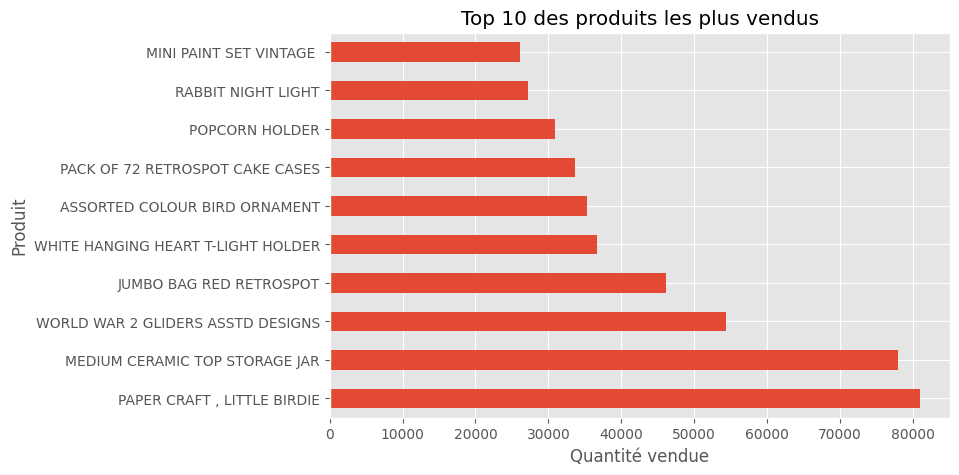

In [61]:
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 des produits les plus vendus")
plt.xlabel("Quantité vendue")
plt.ylabel("Produit")
plt.show() 

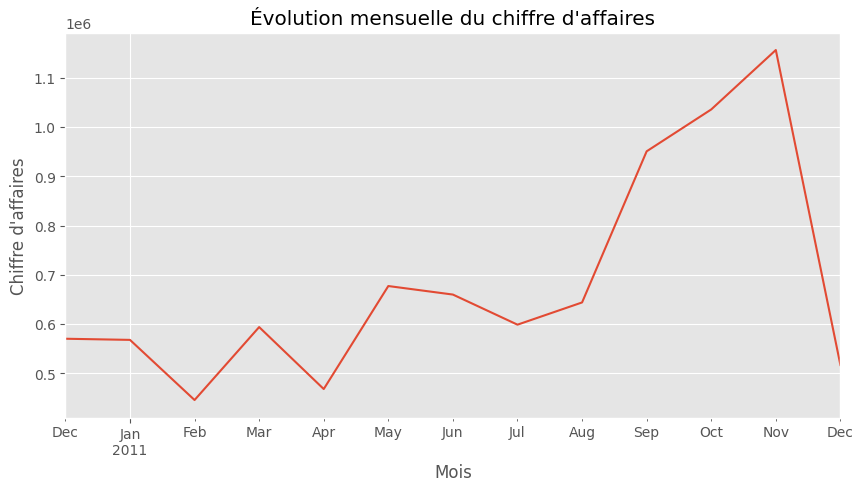

In [62]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Total_Prix"].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires")
plt.show()



### Conclusion
Cette analyse descriptive a permis de :
- Comprendre la structure des données e-commerce
- Nettoyer la base de données
- Créer des variables utiles (montant total, date)

Ces données préparées seront utilisées dans :
- Les règles d’association (APRIORI / FP-GROWTH)
- La segmentation K-means
- La segmentation RFM


In [63]:
# Sauvegarde des données nettoyées
df.to_csv("donnees_ecommerce_netoyer.csv", index=False)
